In [1]:
import pandas as pd 
import numpy as np 
dataset = pd.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\BurgsDevelopment\Jai Data Analysis\blinds_edited.csv")
dataset.keys()

Index(['wearable', 'soc', 'cvip', 'cpu', 'gpu', '5v_sys', 'wlan', 'nvme_pwr1',
       'nvme_pwr3', 'nvme_pwr2', 'vddp_run', 'vddp_s5', 'LPDDR_PWR',
       'PROC_TOT_PWR', 'THERM_TOT_PWR', 'THERM_TOT_PWR-throttle',
       'Tboard_soc1tmp', 'Tdiode_soc1tmp', 'battery', 'chrgr', 'ddr1', 'ddr2',
       'mem', 'mero2', 'vrm'],
      dtype='object')

In [2]:
print(dataset)

      wearable      soc     cvip      cpu      gpu   5v_sys    wlan  \
0      4423000  1050000  2138000  1080000   105000  5070000  125000   
1      4423000  1110000  1315000   630000   105000  4891000  125000   
2      4423000  1296000  1496000   853000   105000  4891000  246000   
3      4456000  1184000  2043000  1134000   105000  4891000  246000   
4      4456000  1265000  1995000   711000  2864000  5130000  229000   
...        ...      ...      ...      ...      ...      ...     ...   
1255   5023000  1162000  2399000  1242000   963000  5771000  212000   
1256   4886000  1376000  1496000   731000   105000  5745000  203000   
1257   4886000  1442000  1354000  1129000  1215000  5745000  203000   
1258   4886000  1176000  1267000  1895000   105000  5745000  203000   
1259   4731000  1398000  1354000   772000   105000  5566000  228000   

      nvme_pwr1  nvme_pwr3  nvme_pwr2  ...  THERM_TOT_PWR-throttle  \
0             0       5000      11000  ...                25000000   
1      

In [3]:
X= dataset.iloc[:, 1:]
print(X)

          soc     cvip      cpu      gpu   5v_sys    wlan  nvme_pwr1  \
0     1050000  2138000  1080000   105000  5070000  125000          0   
1     1110000  1315000   630000   105000  4891000  125000      10000   
2     1296000  1496000   853000   105000  4891000  246000          0   
3     1184000  2043000  1134000   105000  4891000  246000          0   
4     1265000  1995000   711000  2864000  5130000  229000          0   
...       ...      ...      ...      ...      ...     ...        ...   
1255  1162000  2399000  1242000   963000  5771000  212000          0   
1256  1376000  1496000   731000   105000  5745000  203000          0   
1257  1442000  1354000  1129000  1215000  5745000  203000          0   
1258  1176000  1267000  1895000   105000  5745000  203000          0   
1259  1398000  1354000   772000   105000  5566000  228000          0   

      nvme_pwr3  nvme_pwr2  vddp_run  ...  THERM_TOT_PWR-throttle  \
0          5000      11000     65000  ...                25000000 

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(X)
scaled_X = model.transform(X)

In [9]:
from sklearn.decomposition import PCA
pca1 = PCA()
X_pca1 = pca1.fit_transform(scaled_X)
X.shape

(1260, 24)

In [10]:
#variation shows how much variance each category has 
pca1.explained_variance_ratio_

array([6.74961385e-01, 9.25148096e-02, 5.52145582e-02, 3.94857025e-02,
       3.37946444e-02, 2.32749248e-02, 1.79603758e-02, 1.63461031e-02,
       1.29115818e-02, 1.12605711e-02, 6.23845953e-03, 5.46359653e-03,
       4.30737596e-03, 3.42961225e-03, 1.54676782e-03, 6.69099289e-04,
       4.26173515e-04, 1.51056049e-04, 2.10044214e-05, 1.03642522e-05,
       7.07909903e-06, 4.75507496e-06, 2.96849618e-32, 1.41757112e-35])

[]

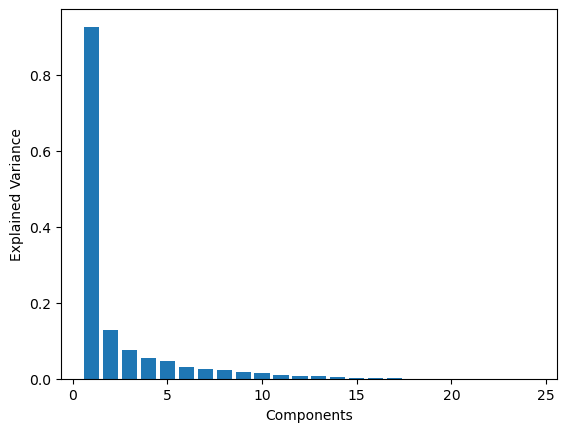

In [15]:
import matplotlib.pyplot as plt 
plt.bar(range(1,len(pca1.explained_variance_)+1),pca1.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot()

Text(0, 0.5, 'Explained Variance')

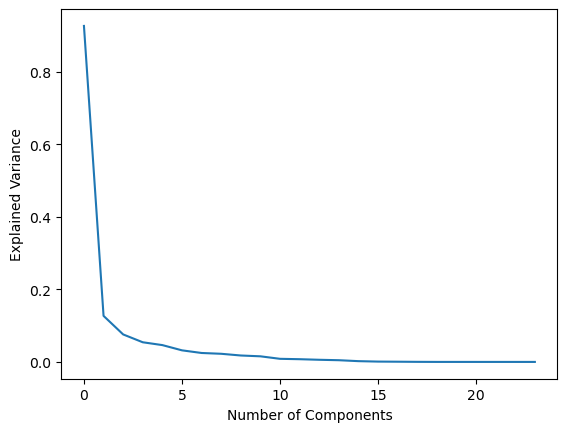

In [16]:
plt.plot(pca1.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [17]:
#getting the components that explain about 95% of the variance in the data 
pca2 = PCA(0.95)
X_pca2 = pca2.fit_transform(scaled_X)
X_pca2.shape

(1260, 8)

In [18]:
#getting the top 2 components 
pca3 = PCA(n_components=2)
X_pca3 = pca3.fit_transform(scaled_X)

In [23]:
loadings = pd.DataFrame(pca3.components_.T, columns=['PC1', 'PC2'], index=dataset.columns[:24])

In [25]:
print(loadings)

                             PC1       PC2
wearable               -0.038255 -0.171822
soc                    -0.015687 -0.008428
cvip                   -0.036619  0.156097
cpu                    -0.059602 -0.564658
gpu                    -0.047577 -0.032659
5v_sys                 -0.012351  0.017308
wlan                    0.002350 -0.001833
nvme_pwr1               0.014533 -0.001175
nvme_pwr3               0.003148 -0.002603
nvme_pwr2              -0.009738  0.016774
vddp_run               -0.286911 -0.019734
vddp_s5                -0.175370  0.024436
LPDDR_PWR              -0.077130  0.571674
PROC_TOT_PWR           -0.092668  0.542056
THERM_TOT_PWR           0.000000 -0.000000
THERM_TOT_PWR-throttle -0.309350 -0.023168
Tboard_soc1tmp         -0.295381 -0.014529
Tdiode_soc1tmp         -0.311266 -0.029124
battery                -0.313667 -0.020884
chrgr                  -0.310987 -0.018762
ddr1                   -0.316955 -0.018159
ddr2                   -0.292213 -0.022237
mem        